This is a minimal example illustrating what `saltax` can give you. 

Lanqing, Apr 22 2024

There will be 3 datasets in the end:
- `data`: Exactly the same as `v14` offline real data.
- `simulation`: Events reconstructed using the simulation instruction only, there is nothing else in the reconstruction process.
- `sprinkled`: Events reconstructed by mixing simulation and data. Some time it is also called `salt` and they mean the same thing. 

In [1]:
import saltax
import strax
import matplotlib.pyplot as plt

2025-02-19 08:01:38,593 - admix - WARNING - Initializing utilix DB failed. You cannot do database operations


DB initialization failed


*** Detector definition message ***
You are currently using the default XENON10 template detector.



Now let's define contexts in the `saltax` fasion. Here we define a `fuse`-based context. If you want a `wfsim`-based context, just do `sxenonnt` instead.

Once you define the contexts below, it will
- Try to fetch simulation instruction specified by the context
- If no instruction found, generate simulation instruction in `wfsim` format (even for `fuse`-based context. The translation to `fuse` instruction format happen later when you compute `microphysics_summary`)
- Register the `saltax` plugins as well as the `cutax` and `straxen` standard ones if not replaced.

In [2]:
# You only need runid in context when you need to compute raw_records_simu
# salt mode: reconstruction from a mixture of data and simulation
st_salt = saltax.contexts.fxenonnt(runid=37119, saltax_mode="salt")
# simu mode: reconstruction from simulation only
st_simu = saltax.contexts.fxenonnt(runid=37119, saltax_mode="simu")

By default, the context above will simuilate flat beta ER band at 50 Hz.

In [3]:
??saltax.contexts.fxenonnt

Signature:
saltax.contexts.fxenonnt(
    runid=None,
    saltax_mode='salt',
    output_folder='./fuse_data',
    cut_list=<class 'cutax.cut_lists.basic.BasicCuts'>,
    corrections_version='global_v16',
    simu_config_version='sr1_dev',
    run_id_specific_config={'gain_model_mc': 'gain_model', 'electron_lifetime_liquid': 'elife', 'drift_velocity_liquid': 'electron_drift_velocity', 'drift_time_gate': 'electron_drift_time_gate'},
    run_without_proper_corrections=False,
    generator_name='flat',
    recoil=8,
    simu_mode='all',
    unblind=True,
    **kwargs,
)
Source:   
def fxenonnt(
    runid=None,
    saltax_mode="salt",
    output_folder="./fuse_data",
    cut_list=cutax.BasicCuts,
    corrections_version=DEFAULT_XEDOCS_VERSION,
    simu_config_version="sr1_dev",
    run_id_specific_config={
        "gain_model_mc": "gain_model",
        "electron_lifetime_liquid": "elife",
        "drift_velocity_liquid": "electron_drift_velocity",
        "drift_time_gate": "electron_drift_

In [4]:
# Just to bind the storage so we have access to the raw_records of a small run
st_salt.storage.append(strax.DataDirectory("/project2/lgrandi/tutorial_data", readonly=True))
st_simu.storage.append(strax.DataDirectory("/project2/lgrandi/tutorial_data", readonly=True))

You can take a look that some plugins are replaced while some are not.

In [5]:
st_simu._plugin_class_registry["peaklets"]

saltax.plugins.peaklets.SPeaklets

In [6]:
st_simu._plugin_class_registry["microphysics_summary"]

saltax.plugins.f_raw_records.SChunkCsvInput

In [7]:
st_simu._plugin_class_registry["event_info"]

straxen.plugins.events.event_info.EventInfo

In [8]:
st_simu._plugin_class_registry["cuts_basic"]

cutax.cut_lists.basic.BasicCuts

Now let's make some data! Note that both contexts have the same hashes until `peaklets`, where the merging happens.

In [9]:
st_salt.key_for("037119", "peaklets")

/opt/XENONnT/anaconda/envs/XENONnT_el7.2024.10.3/lib/python3.9/site-packages/straxen/config/preprocessors.py:16: UserWarning: From straxen version 2.1.0 onward, URLConfig parameterswill be sorted alphabetically before being passed to the plugins, this will change the lineage hash for non-sorted URLs. To load data processed with non-sorted URLs, you will need to use an older version.
  warnings.warn(


037119-peaklets-xwuqqzqfke

In [10]:
st_simu.key_for("037119", "peaklets")

037119-peaklets-3vtnvjenyk

In [11]:
st_salt.key_for("037119", "records")

037119-records-zgdk5mmpkk

In [12]:
st_simu.key_for("037119", "records")

037119-records-zgdk5mmpkk

In [13]:
dtypes = [
    "microphysics_summary",
    "raw_records_simu",
    "records",
    "peaklets",
    "peak_basics",
    "events",
    "event_basics",
    "event_info",
]
for dt in dtypes:
    st_salt.make("037119", dt, save=(dt))
for dt in dtypes:
    st_simu.make("037119", dt, save=(dt))

SChunkCsvInput with object id: 140316865974864 waits for chunk 1
SChunkCsvInput with object id: 140316865974864 waits for chunk 2
SChunkCsvInput with object id: 140316865974864 waits for chunk 3
SChunkCsvInput with object id: 140316865974864 waits for chunk 4
SChunkCsvInput with object id: 140316865974864 waits for chunk 5


/opt/XENONnT/anaconda/envs/XENONnT_el7.2024.10.3/lib/python3.9/site-packages/straxen/storage/mongo_storage.py:321: DownloadWarning: Downloading fuse_config_nt_sr1_dev.json to ./resource_cache/0af2986c629de6ff6ac0aa9162cccf7d
  warn(f"Downloading {config_name} to {destination_path}", DownloadWarning)
/opt/XENONnT/anaconda/envs/XENONnT_el7.2024.10.3/lib/python3.9/site-packages/straxen/storage/mongo_storage.py:321: DownloadWarning: Downloading XENONnT_SR0_spe_distributions_20210713_no_noise_scaled.csv to ./resource_cache/99c2cbc580cfa8eeebe831456076e136
  warn(f"Downloading {config_name} to {destination_path}", DownloadWarning)
/opt/XENONnT/anaconda/envs/XENONnT_el7.2024.10.3/lib/python3.9/site-packages/straxen/storage/mongo_storage.py:321: DownloadWarning: Downloading field_dependent_radius_depth_maps_B2d75n_C2d75n_G0d3p_A4d9p_T0d9n_PMTs1d3n_FSR0d65p_QPTFE_0d5n_0d4p.json.gz to ./resource_cache/487272e33b4c832ae715350b6275ba0b
  warn(f"Downloading {config_name} to {destination_path}", Dow

Let's take a quick look.

In [14]:
events_simu = st_simu.get_array("037119", "event_info")
events_salt = st_salt.get_array("037119", "event_info")

Loading event_info: |          | 0.00 % [00:00<?]

Loading event_info: |          | 0.00 % [00:00<?]

Text(0, 0.5, 'CS2 [PE]')

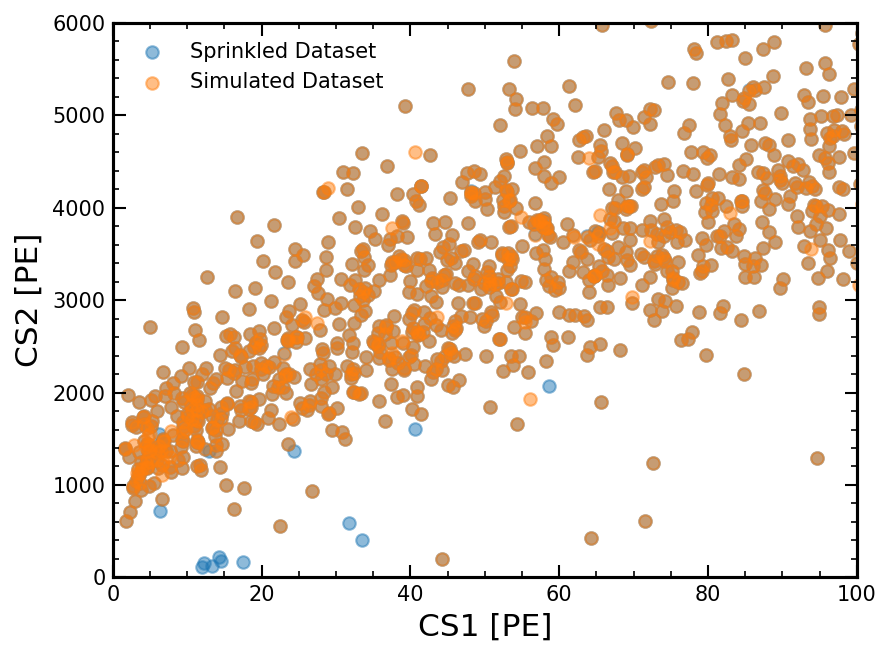

In [15]:
plt.figure(dpi=150)
plt.scatter(events_salt["cs1"], events_salt["cs2"], alpha=0.5, label="Sprinkled Dataset")
plt.scatter(events_simu["cs1"], events_simu["cs2"], alpha=0.5, label="Simulated Dataset")
plt.legend()
plt.xlim(0, 100)
plt.ylim(0, 6000)
plt.xlabel("CS1 [PE]")
plt.ylabel("CS2 [PE]")

In an ideal worlad without ambience interference, all the orange dots will be fully overlapped with a blue dot. However, it seems not from the plot. You now starts to see what is ambience interference. See [here](https://xe1t-wiki.lngs.infn.it/doku.php?id=lanqing:ambience_interference_and_sprinkling) for details.